# Exploratory Data Analysis on Pokemon Dataset
## Introduction
The Pokémon dataset contains detailed information about various Pokémon species, including their base stats, types, legendary status, and generation. Each Pokémon has attributes such as HP, Attack, Defense, Speed, and whether it possesses one or two elemental types. The dataset also includes indicators for legendary Pokémon, which are typically rarer and more powerful.

Our task is to explore the dataset to uncover patterns in Pokémon characteristics, compare single vs. dual types, and analyze how stats and type distributions vary across generations and legendary status.

**Business Questions**
* Which types are the most common among Pokémon?
* How do Single Type and Dual Type Pokémon compare in distribution?
* Which Pokémon types have the highest average base stats?
* Are Legendary Pokémon significantly stronger than non-Legendaries?
* How are stats distributed across different generations?
* Which stat (Attack, Defense, Speed, etc.) has the highest variance among Pokémon?
* Is there a relationship between having two types and overall stat totals?
---
## Preparing the Environment
We will import the required libraries:
* Pandas - Data manipulation
* Matplotlib and Seaborn - Data visualization

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv('pokemon.csv')

## Data Exploration

Lets have a look at the general data using the df.head() funciuon.

In [193]:
pd.set_option('display.max_columns', None)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


From first glance at the data, we can note:
* Basic identifiers: such as Pokédex number, generation, and whether the Pokémon is legendary.
* Typing information: primary and secondary types (type1 and type2).
* Battle statistics: including HP, Attack, Defense, Special Attack, Special Defense, and Speed.
* Type effectiveness: *against_* columns show multipliers for how effective other types are against the Pokémon (e.g., against_fire = 2.0 means it takes double damage from fire).
* Abilities: stored as lists of possible abilities for each Pokémon.

We'll check to make sure the types are as expected.

In [248]:
# Shape of data
df.shape

(801, 41)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [35]:
# Check for duplicate entries
duplicates = df[df.duplicated()]
if duplicates.shape[0] == 0:
  print("No duplicates")
else:
  print("Duplicates found!")
  print(duplicates)

No duplicates


There are 801 rows and 41 columns. Data types are consistent o what we expect. There are no duplicates in the data.

## Descriptive Statistics

We will then delve in descriptive statistical analysis. We will use df.describe() to measure species stats.

In [31]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


We're able to note various trends:

**Missing Data**
* *height_m* and *weight_m* have fewer counts (781 vs 801) meaning 20 pokemon have missing height/weight values.
* *percentage_male* has only 703 entries.

**Stats: *Attack / Sp. Attack / Defense / Sp. Defense / Speed***
* While stats tend to have a mean of ~70 and a standard deviation of ~30, there are still extreme outliers going over 200.

**Type Effectiveness: *against_***
* Most values cluster around 1, suggesting even distrubtion of effectivness.

**Physical Attributes**
* There is a large standard deviation of 100kg and 1 meter suggesting a wide variety of shapes and sizes.

**Legendary**
* Only 8.7% of species are considered legendary

## Exploratory Data Analysis

## Univariate Analysis (Single Feature Exploration)



### 1. Which types are most common?

/tmp/ipython-input-246-1042672787.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels())
/tmp/ipython-input-246-1042672787.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


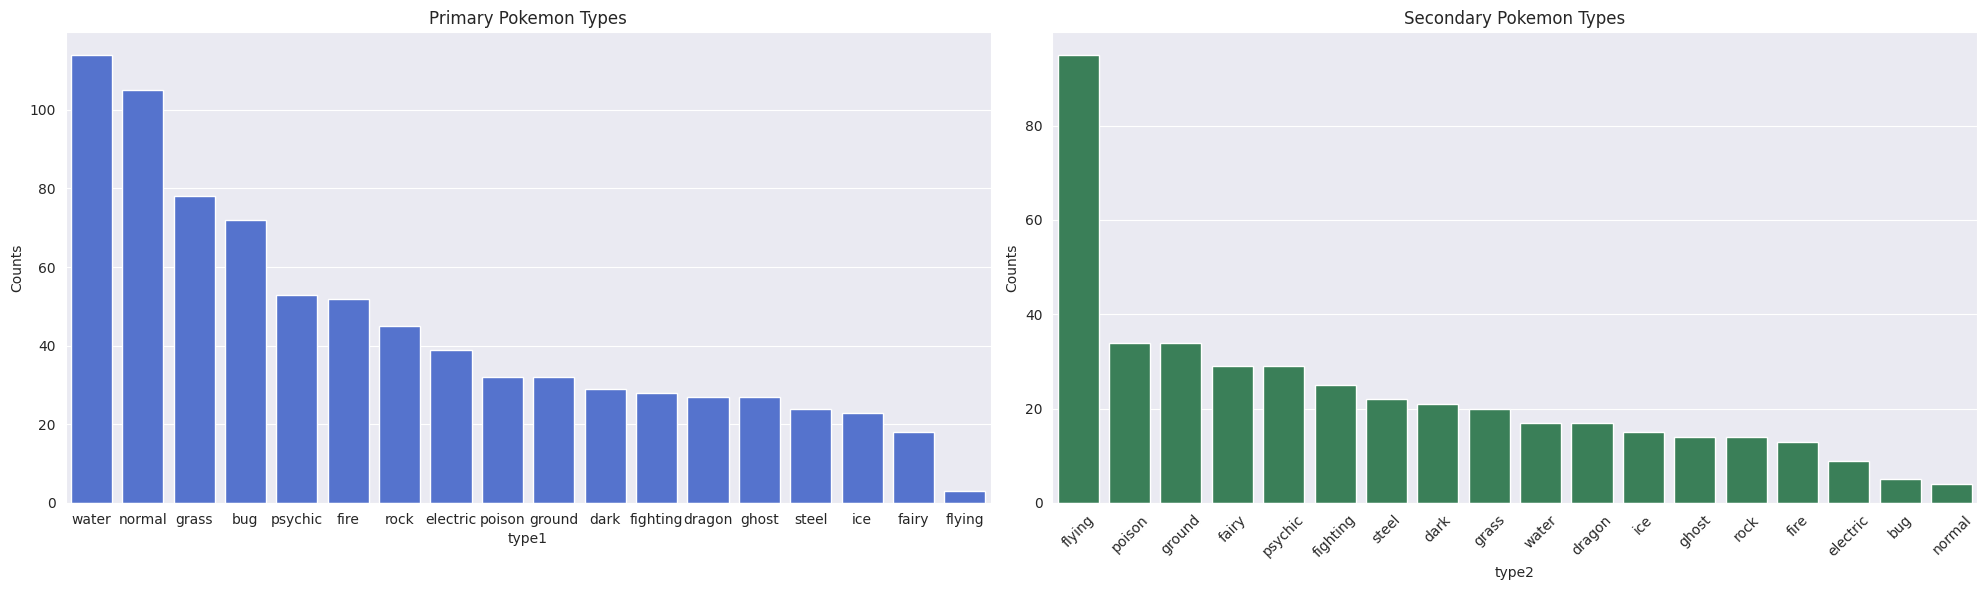

In [246]:
#Types Distrubtion

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

rainbow = sns.color_palette("hsv", len(df['type1']))

type1_counts = df['type1'].value_counts()
sns.barplot(x=type1_counts.index, y=type1_counts.values, ax=axs[0], color='royalblue')
axs[0].set_xticklabels(axs[0].get_xticklabels())
axs[0].set_title("Primary Pokemon Types")
axs[0].set_ylabel("Counts")

type2_counts = df['type2'].value_counts()
sns.barplot(x=type2_counts.index, y=type2_counts.values, ax = axs[1], color='seagreen')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_title("Secondary Pokemon Types")
axs[1].set_ylabel("Counts")

plt.tight_layout()
plt.show()

We can clearly see that the primary types have a consistent downward trend with water being the dominant type. Secondary, is less consistent with flying being the clear lead having twice the count as its runner up. I think it's interesting how fire is fifth most common as primary. Being one of the games base types, I would expect it higher.

## 2. What types have the best/worst stats?

Strongest Type1: {'Hp': ['dragon', 'normal', 'fairy', 'ground', 'psychic'], 'Attack': ['dragon', 'fighting', 'ground', 'steel', 'rock'], 'Defense': ['steel', 'rock', 'dragon', 'ground', 'ghost'], 'Sp_Attack': ['psychic', 'dragon', 'fire', 'electric', 'flying'], 'Sp_Defense': ['fairy', 'psychic', 'dragon', 'steel', 'ghost']} 

Weakest Type1: {'Hp': ['bug', 'electric', 'ghost', 'grass', 'poison'], 'Attack': ['fairy', 'psychic', 'flying', 'bug', 'electric'], 'Defense': ['normal', 'electric', 'flying', 'fighting', 'fire'], 'Sp_Attack': ['fighting', 'ground', 'bug', 'normal', 'poison'], 'Sp_Defense': ['ground', 'bug', 'normal', 'fighting', 'poison']} 

Strongest Type2: {'Hp': ['dragon', 'electric', 'ice', 'fighting', 'ground'], 'Attack': ['fighting', 'steel', 'dark', 'ghost', 'ice'], 'Defense': ['rock', 'steel', 'water', 'ground', 'psychic'], 'Sp_Attack': ['fire', 'dragon', 'normal', 'electric', 'ghost'], 'Sp_Defense': ['psychic', 'steel', 'fairy', 'ghost', 'dragon']} 

Weakest Type2: {'Hp'

/tmp/ipython-input-254-2044414898.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = pd.DataFrame(index=list(all_types), columns=['Strong', 'Weak']).fillna(0)


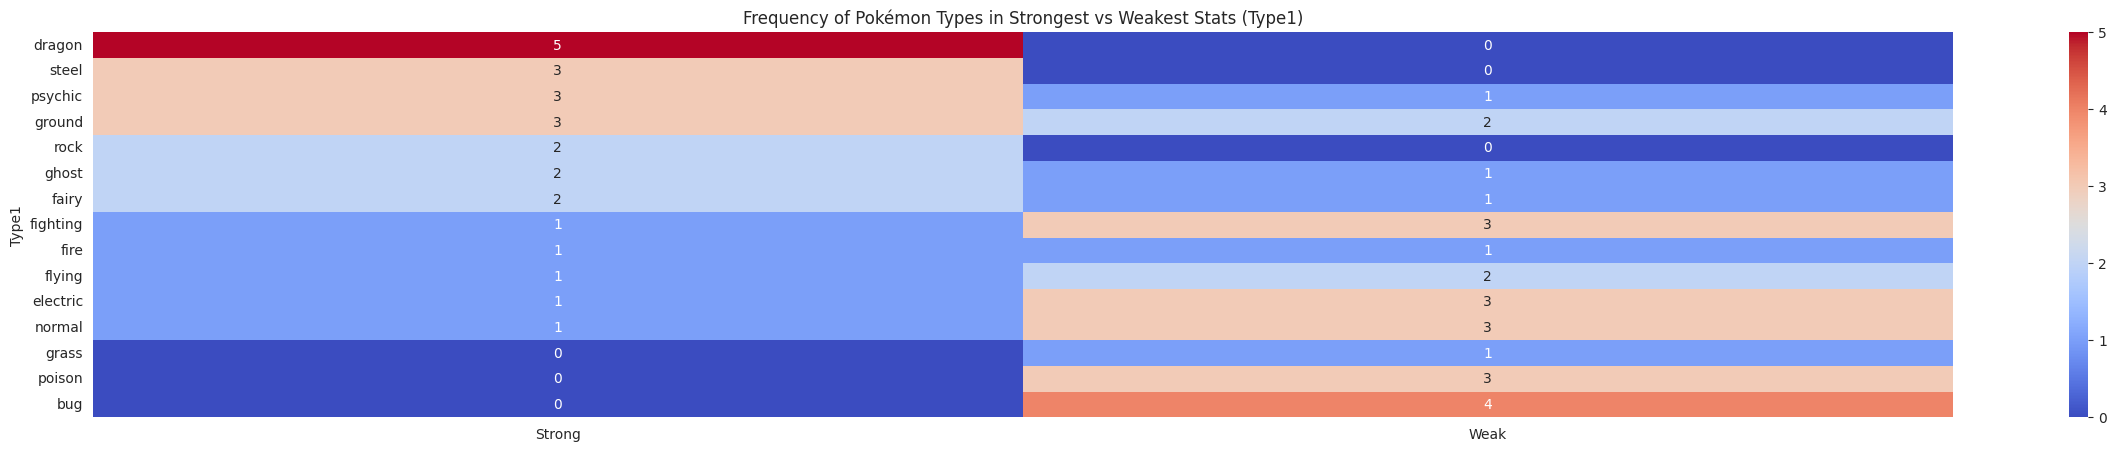

In [254]:
stats_col = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense']

type1_stats = pd.DataFrame(df.groupby(['type1'])[stats_col].mean())
type2_stats = pd.DataFrame(df.groupby(['type2'])[stats_col].mean())

# Create dictionaries
strongest_type1 = {}
weakest_type1 = {}
strongest_type2 = {}
weakest_type2 = {}

for stat in stats_col:
    # Capitalize for dictionary keys
    key = stat.replace('_', ' ').title().replace(' ', '_')

    # Top 5 for Type1
    top5 = list(type1_stats.sort_values(by=stat, ascending=False).index[0:5])
    strongest_type1[key] = top5

    # Bottom 5 for Type1
    bottom5 = list(type1_stats.sort_values(by=stat, ascending=True).index[0:5])
    weakest_type1[key] = bottom5

    # Top 5 for Type2
    top5_t2 = list(type2_stats.sort_values(by=stat, ascending=False).index[0:5])
    strongest_type2[key] = top5_t2

    # Bottom 5 for Type2
    bottom5_t2 = list(type2_stats.sort_values(by=stat, ascending=True).index[0:5])
    weakest_type2[key] = bottom5_t2

# ✅ Now you have all four dictionaries ready:
print("Strongest Type1:", strongest_type1, "\n")
print("Weakest Type1:", weakest_type1, "\n")
print("Strongest Type2:", strongest_type2, "\n")
print("Weakest Type2:", weakest_type2, "\n")

# Convert to DataFrames
strongest_df = pd.DataFrame(strongest_type1)
weakest_df = pd.DataFrame(weakest_type1)

# Count frequency of types
def count_types(data_dict):
    counts = {}
    for stat, types in data_dict.items():
        for t in types:
            counts[t] = counts.get(t, 0) + 1
    return counts

strongest_counts = count_types(strongest_type1)
weakest_counts = count_types(weakest_type1)

# Combine into one DataFrame for heatmap
all_types = set(strongest_counts.keys()).union(weakest_counts.keys())
heatmap_df = pd.DataFrame(index=list(all_types), columns=['Strong', 'Weak']).fillna(0)

for t, c in strongest_counts.items():
    heatmap_df.loc[t, 'Strong'] = c
for t, c in weakest_counts.items():
    heatmap_df.loc[t, 'Weak'] = c

heatmap_df = heatmap_df.astype(float)
heatmap_df = heatmap_df.sort_values(by=['Weak'], ascending=True)
heatmap_df = heatmap_df.sort_values(by=['Strong'], ascending=False)

# Plot heatmap
plt.figure(figsize=(30, 5))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', cbar=True, fmt='g')
plt.title("Frequency of Pokémon Types in Strongest vs Weakest Stats (Type1)")
plt.ylabel("Type1")
plt.show()


We're able to idenitfy top and bottom types per stat and visualize the difference. From first glance, you can clearly see that Dragon and Steel dominate certain stats while holding no specific weakness. This contrasts Bug and Poison which hold no strong stats and hold significant weak stats.

Grass does not show up in the top five for any stats, but does show up as in the weakest HP. This is surprising because Grass is one of the starter choices, but could be argued to be one of the worst types as a species.

---
**Type 1 Patterns**
* Dragon is the only type to consistenly be in the top five of stats (actually top three). This would be good argument to call it the strongest type.
* Ground appears to do best in physical stats (HP, attack , defense)
* Steel dominates defense and is also high in attack and sp. defense
* Psychic is strong in sp. attack and sp. defense, but is weak in physical attack.
* Curiously the Fairy type has the strongest sp_defense and top hp but the weakest attack.
* Bug is consistently in the bottom five
* Eletric types tend to be weaker when it comes to HP, defense, and attack.
* Normal is particualrly weak in defense and sp. defense but strong in attack.

**Cross-Type Patterns**
* Dragon and Steel are universally strong as both type1 and type2.
* Bug, Normal, and Poison are consistenly the weakest of all types.
* Psychic excels in special stats but lacks physical
* Fighting is a the powerhouse when it comes to attack, but severely laks in special stats


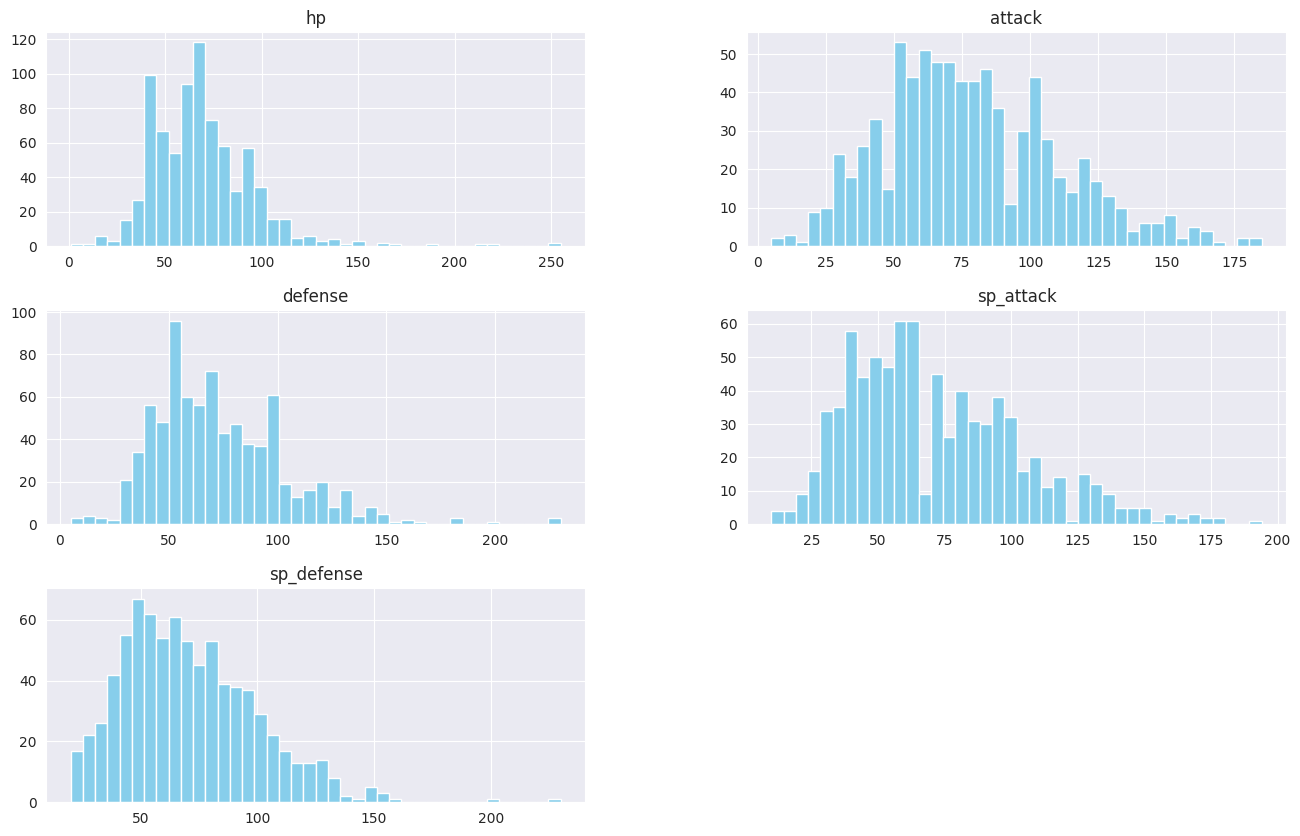

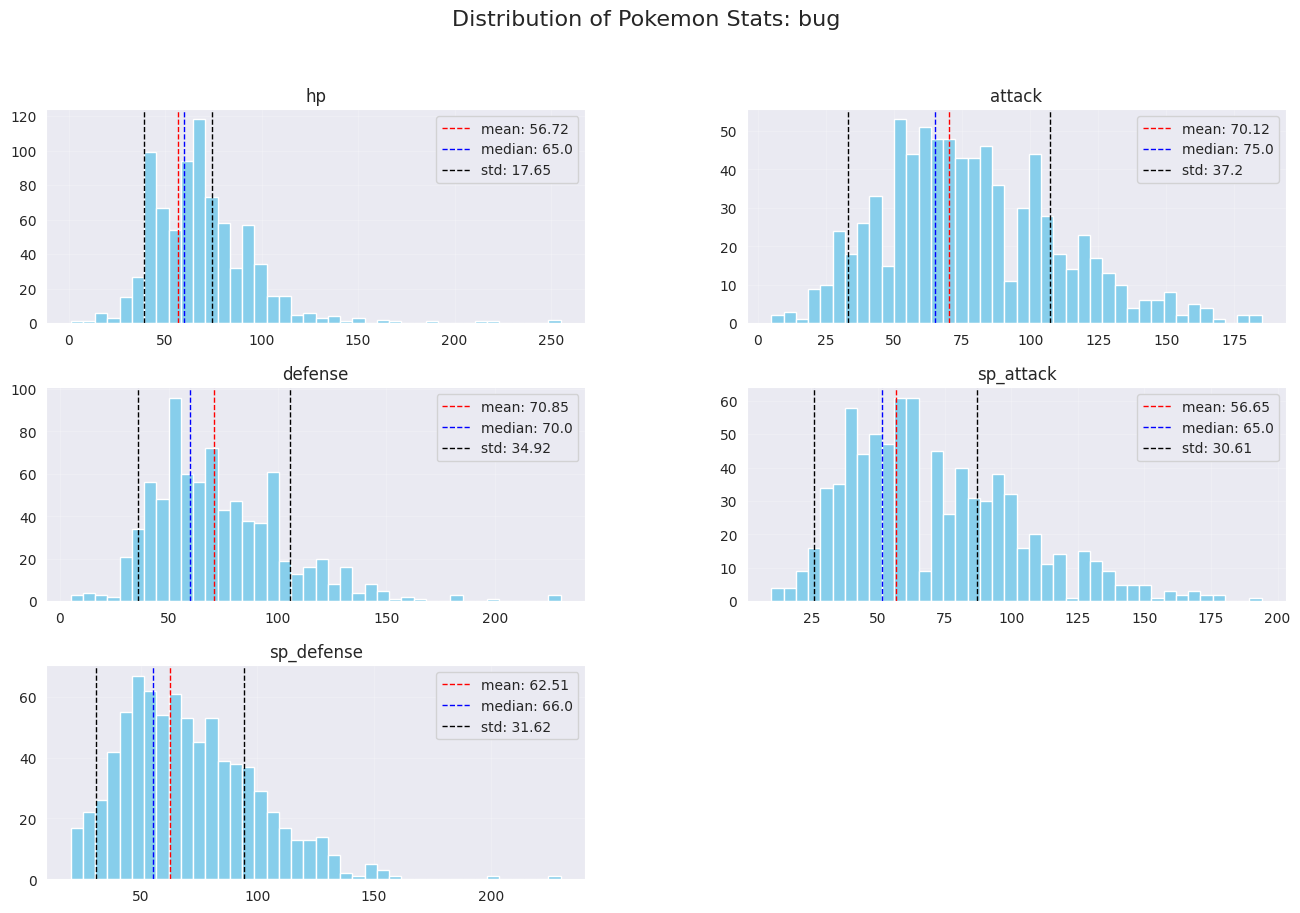

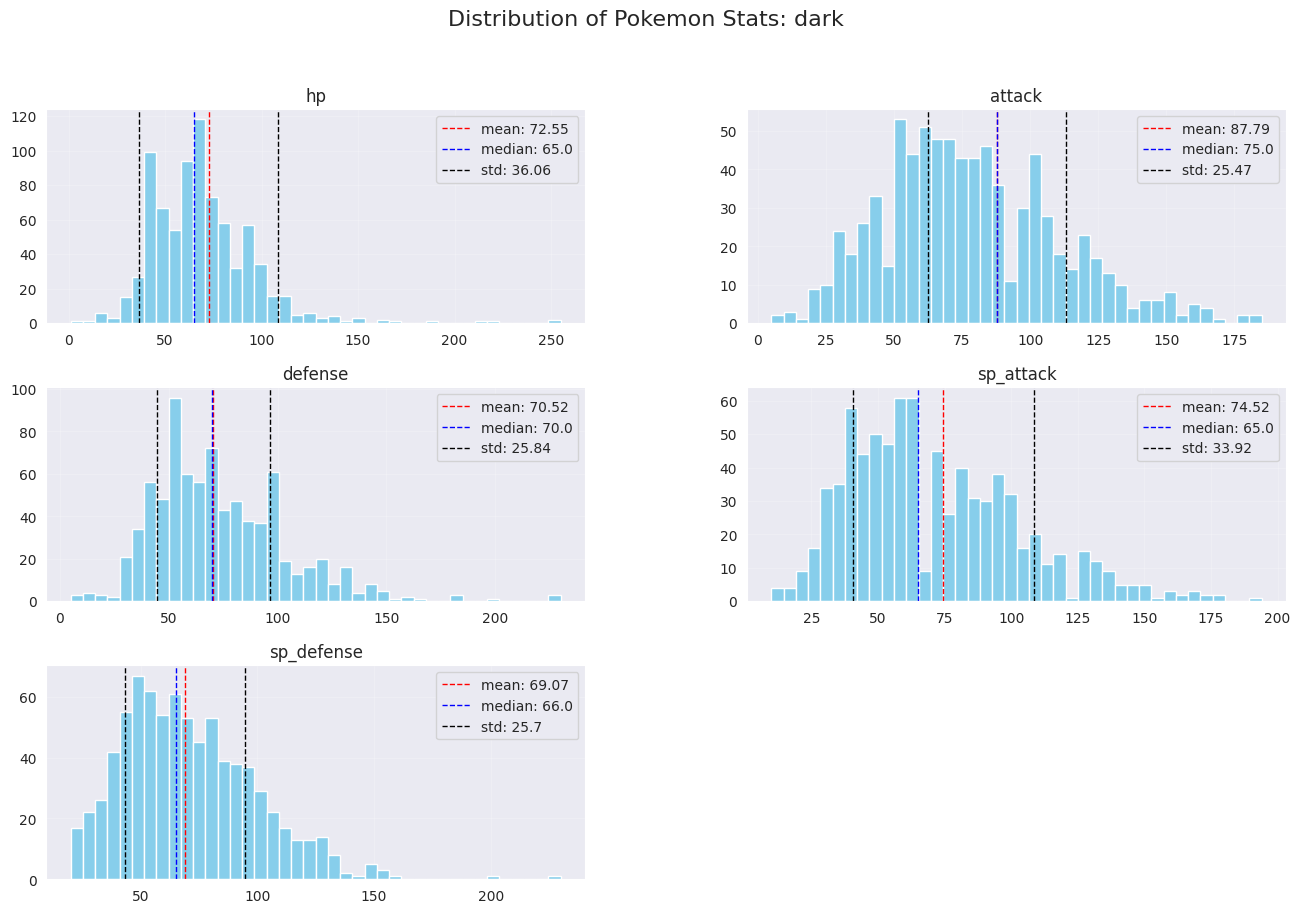

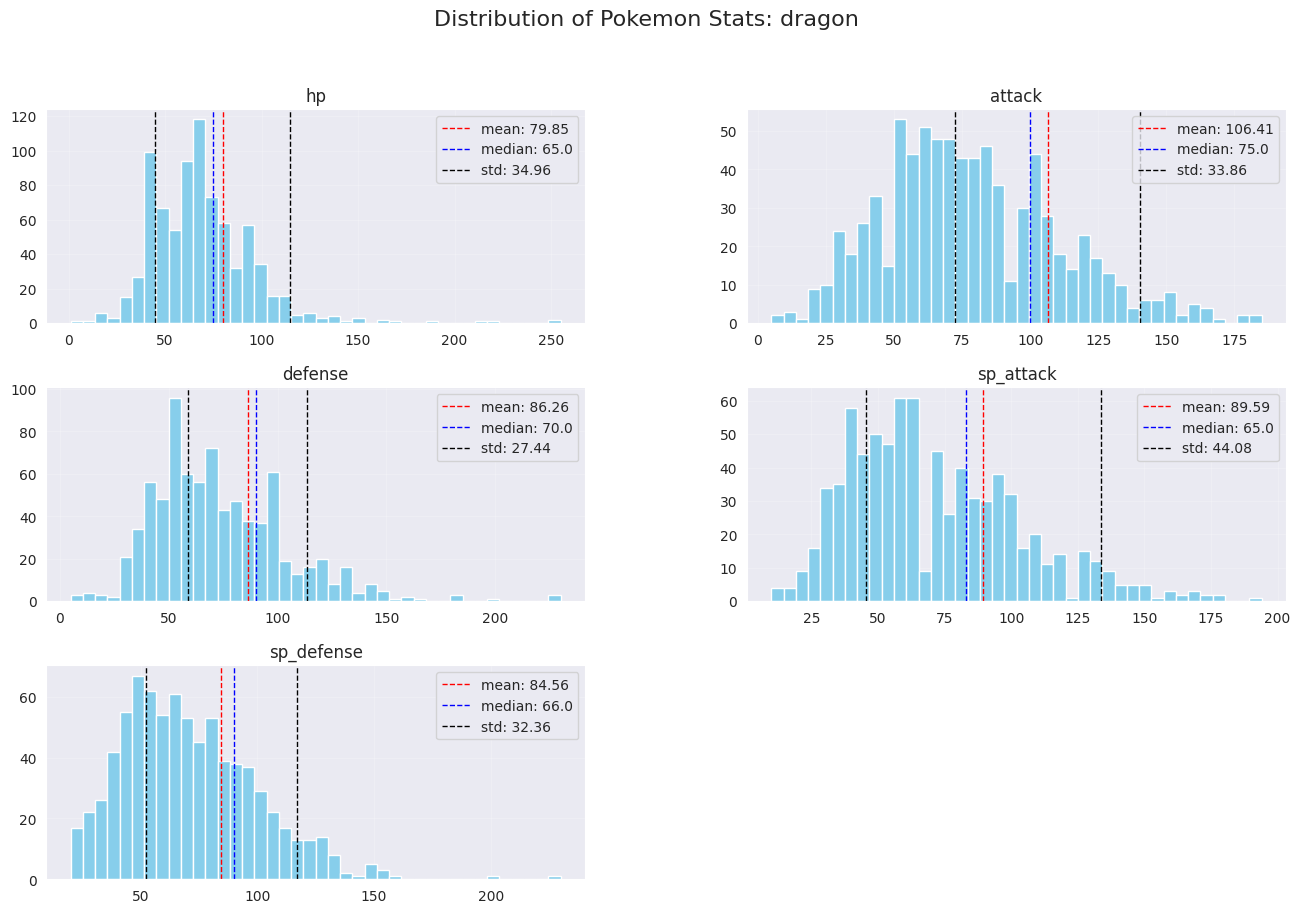

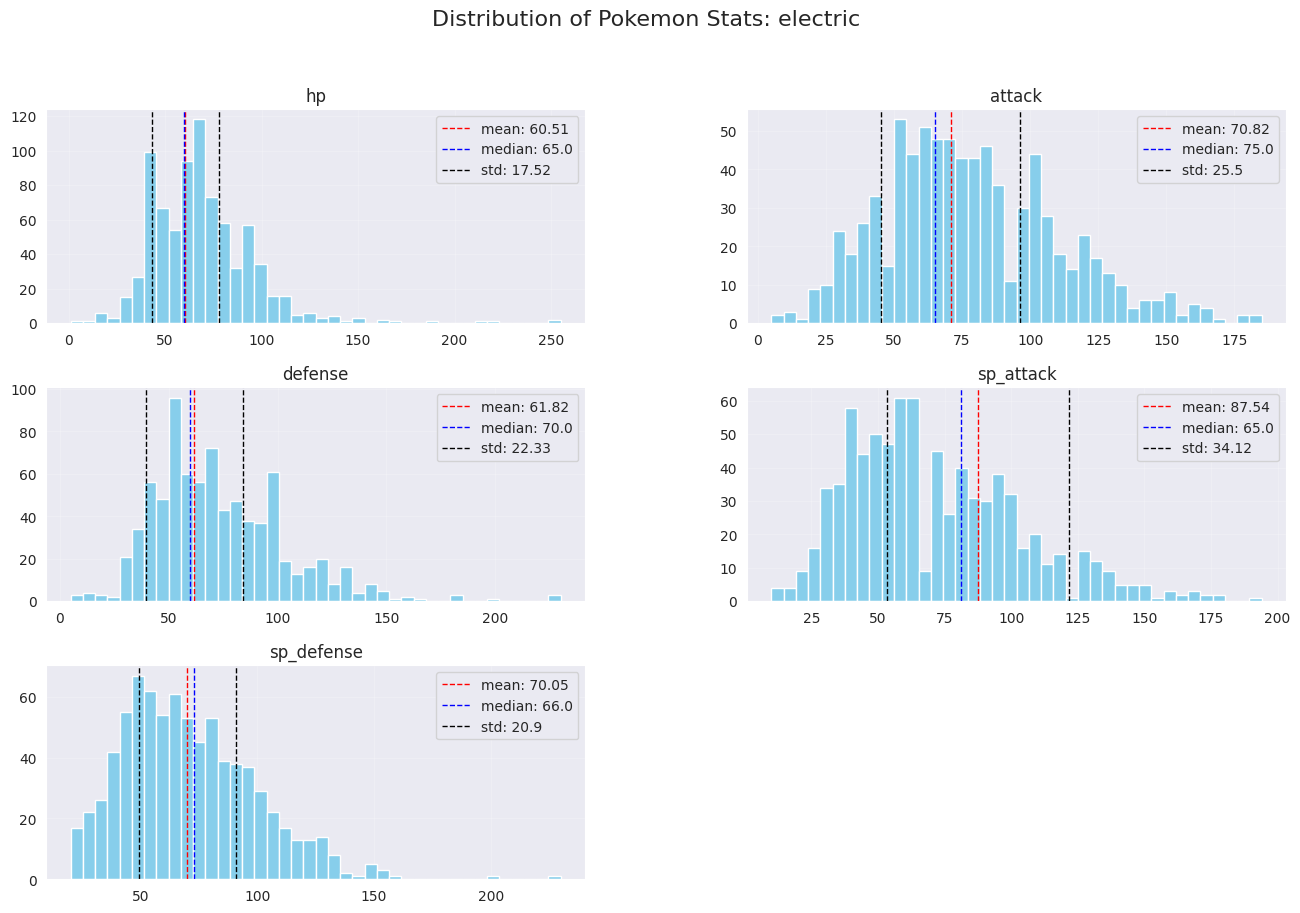

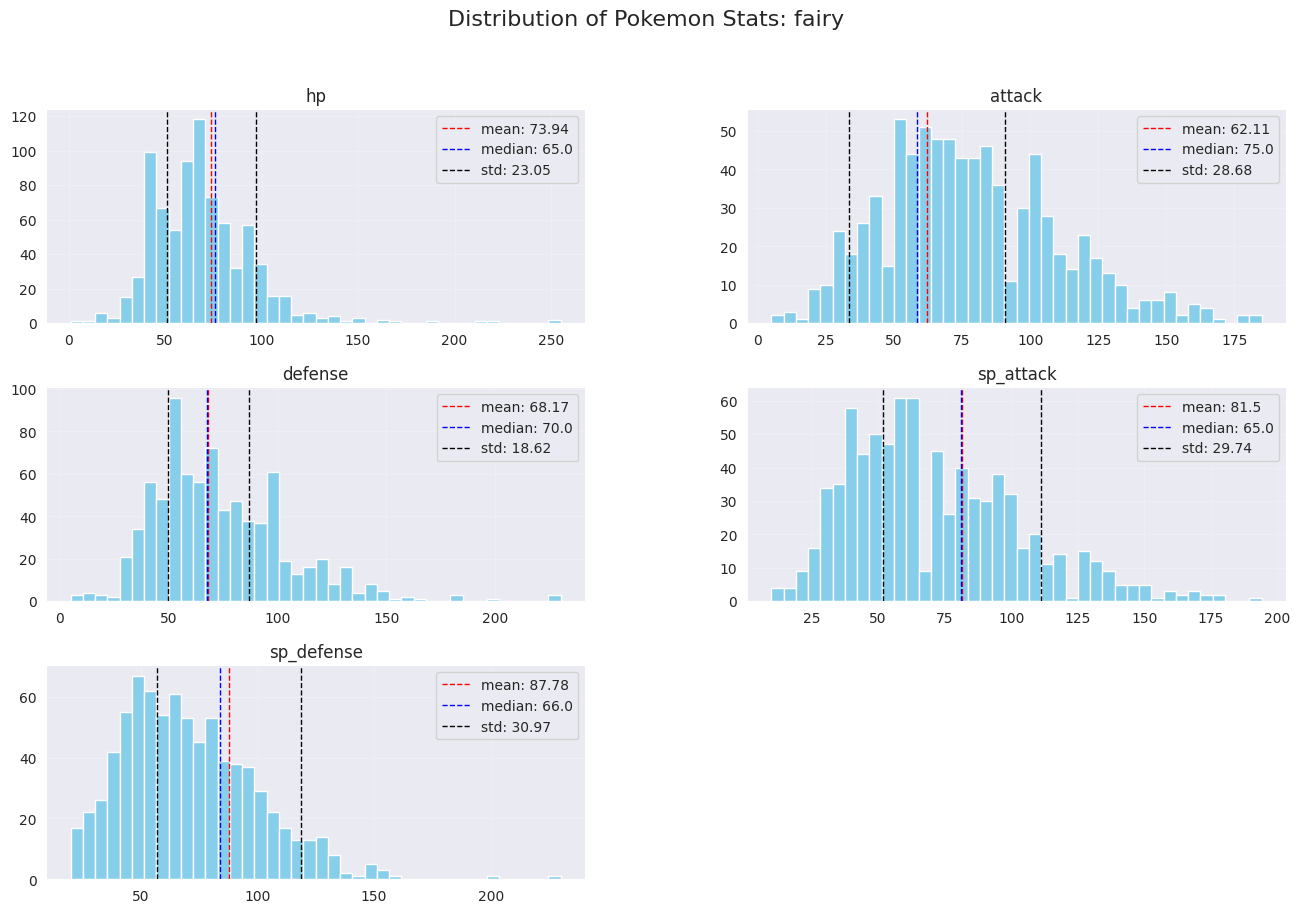

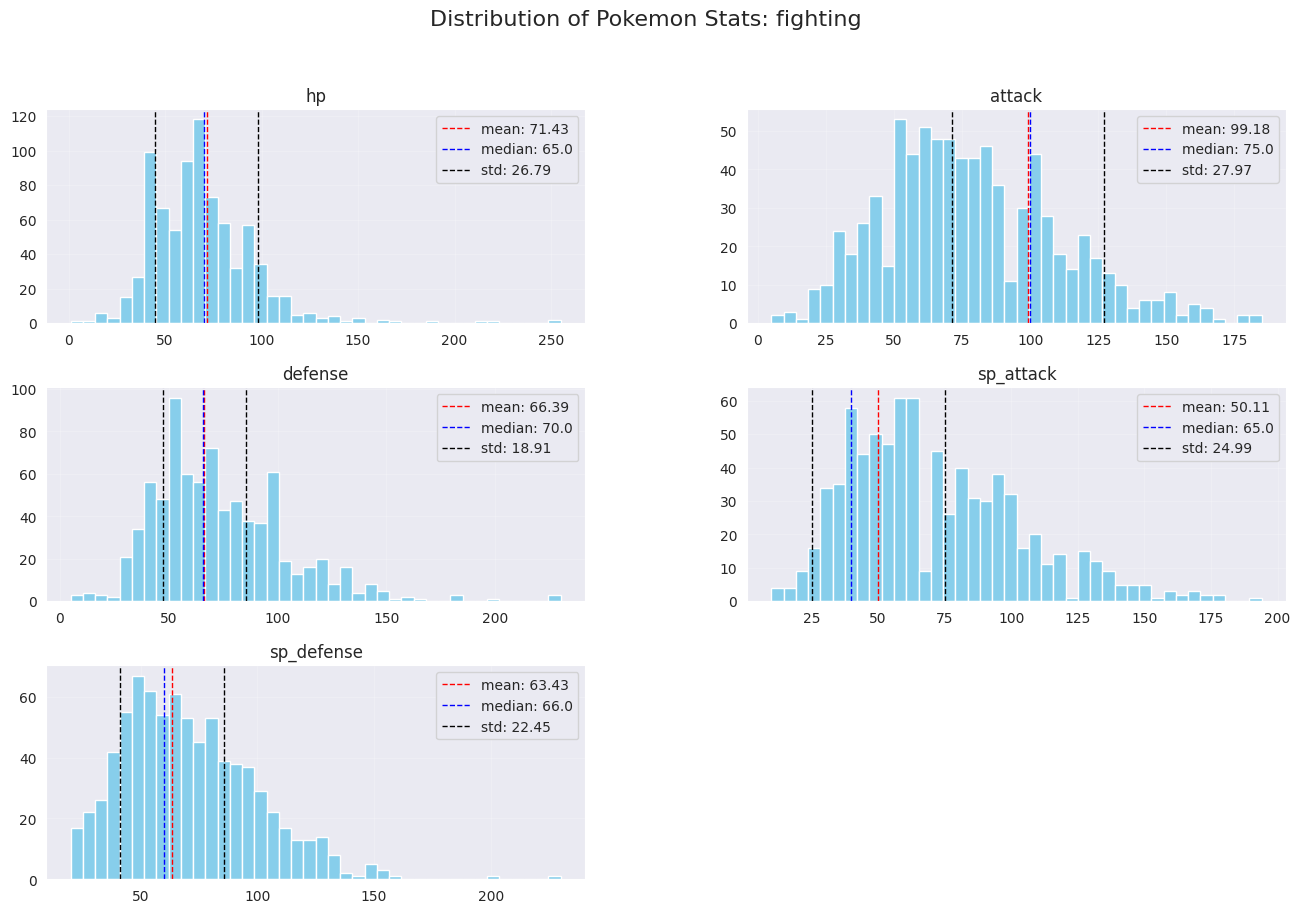

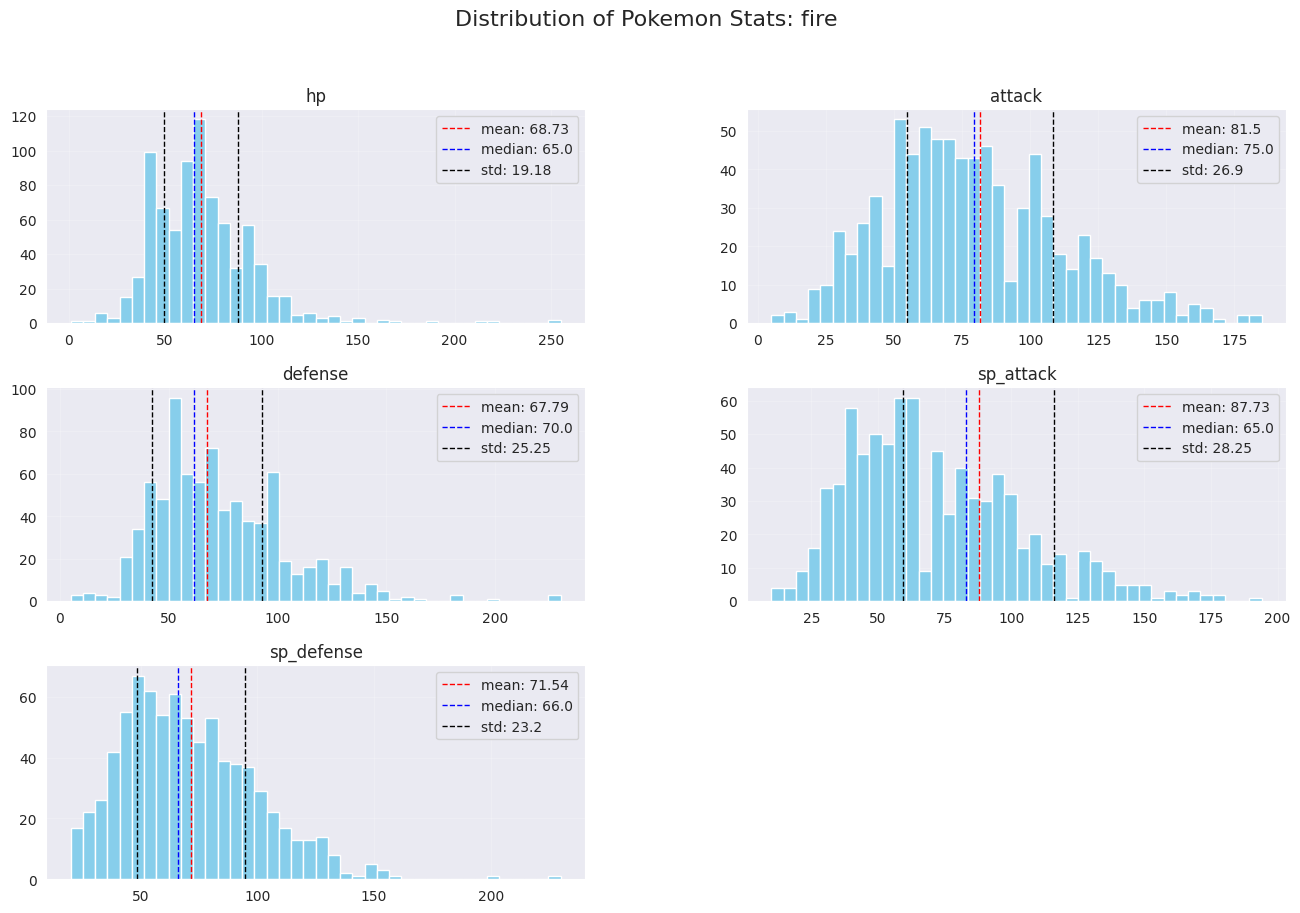

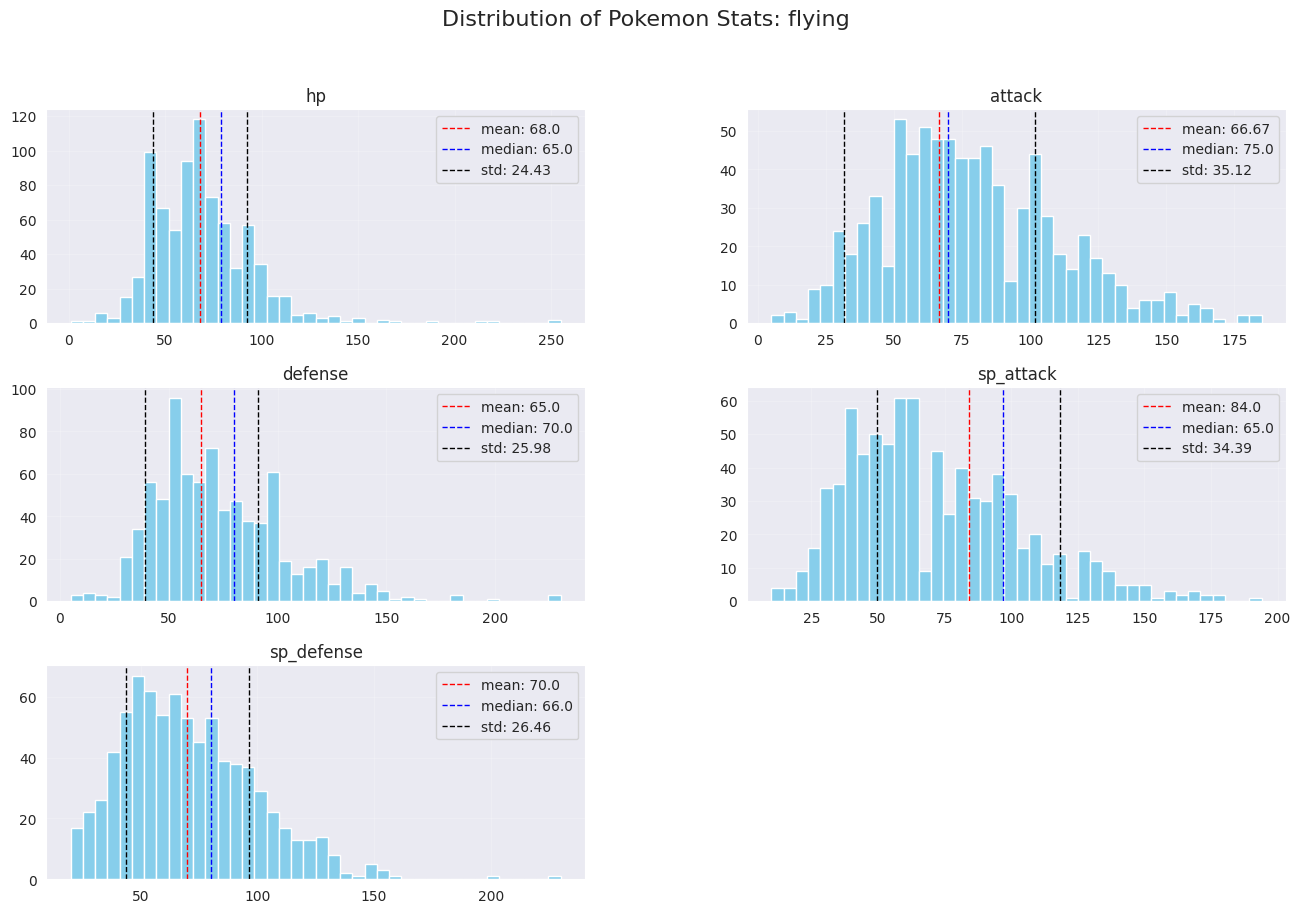

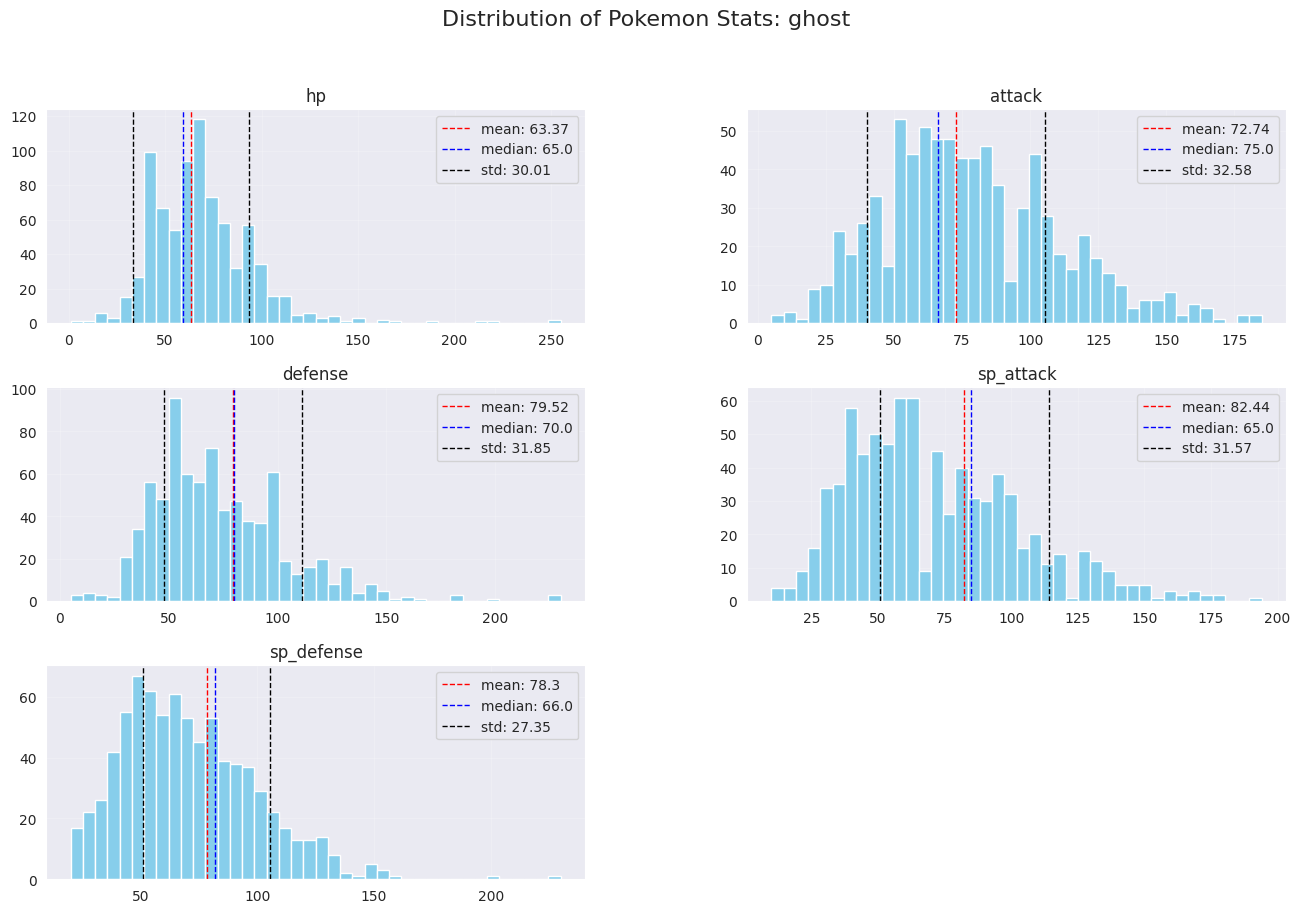

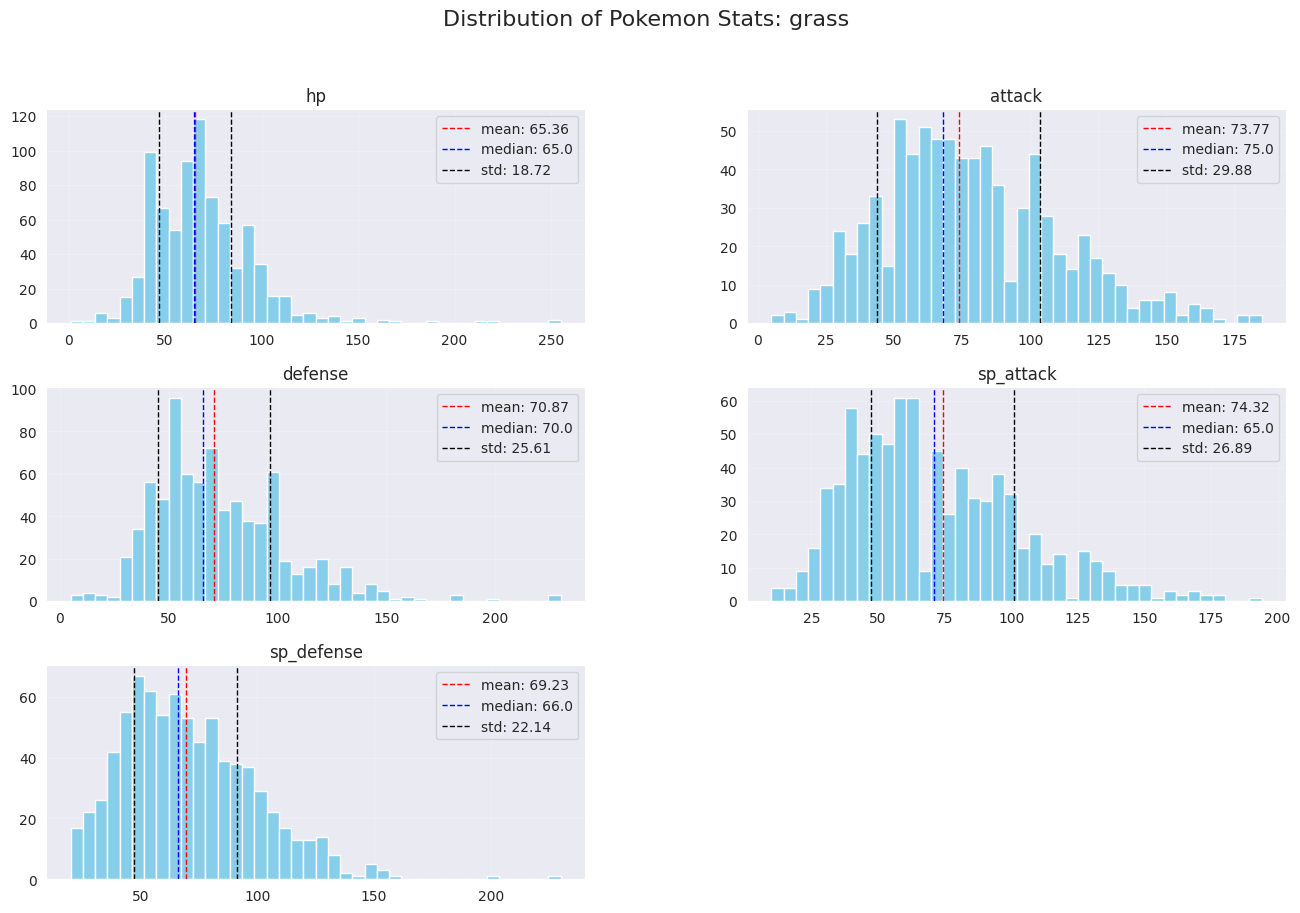

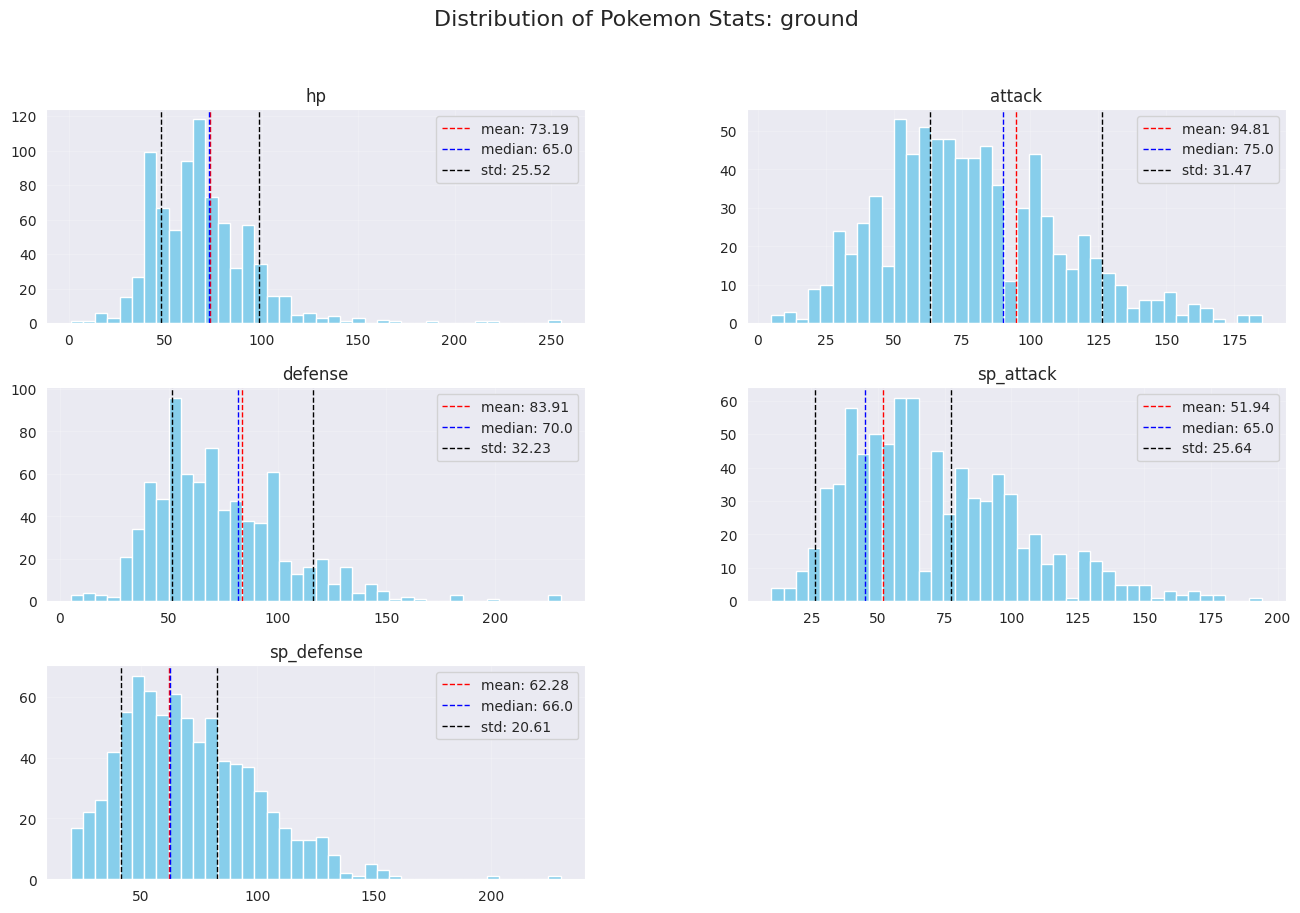

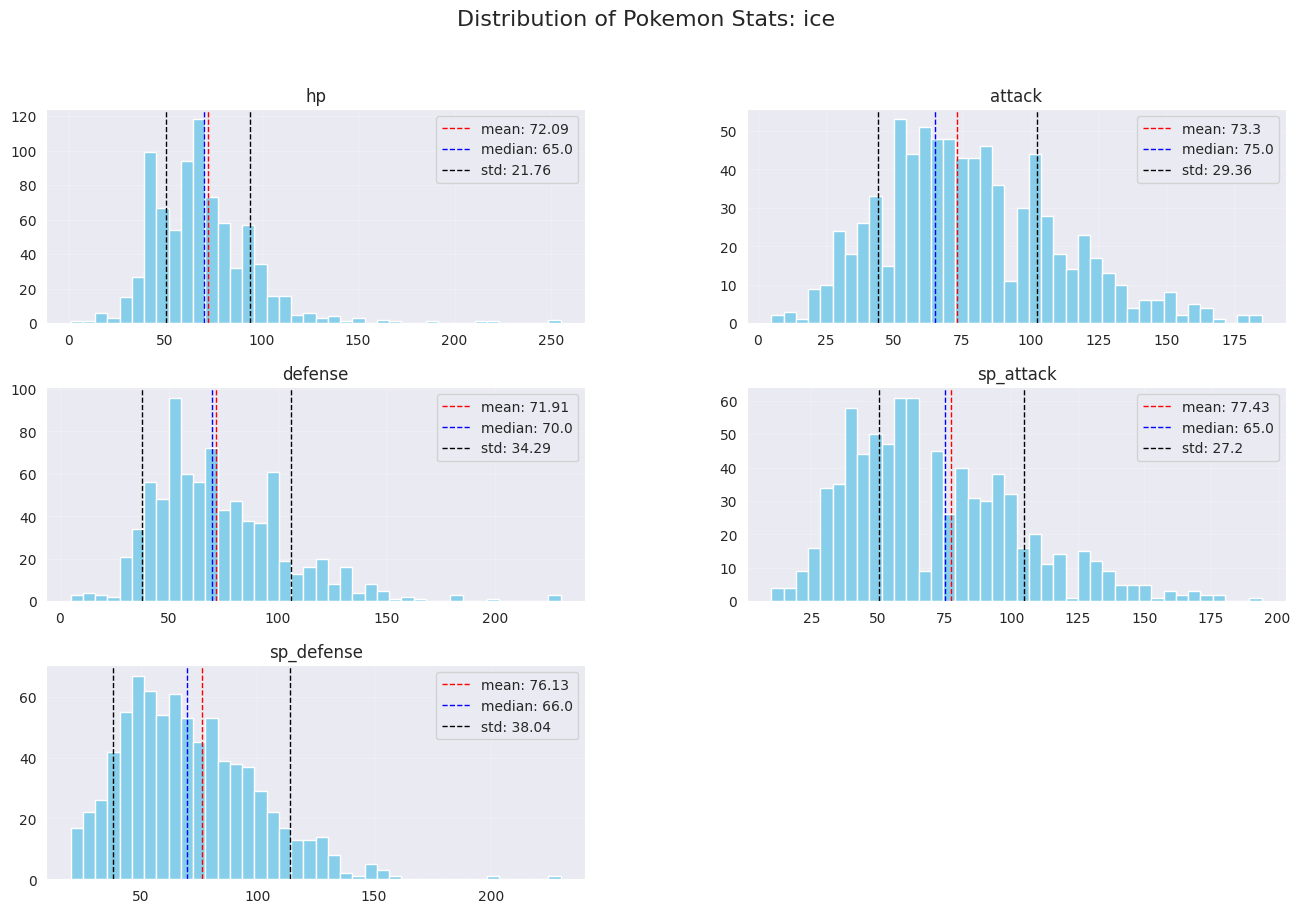

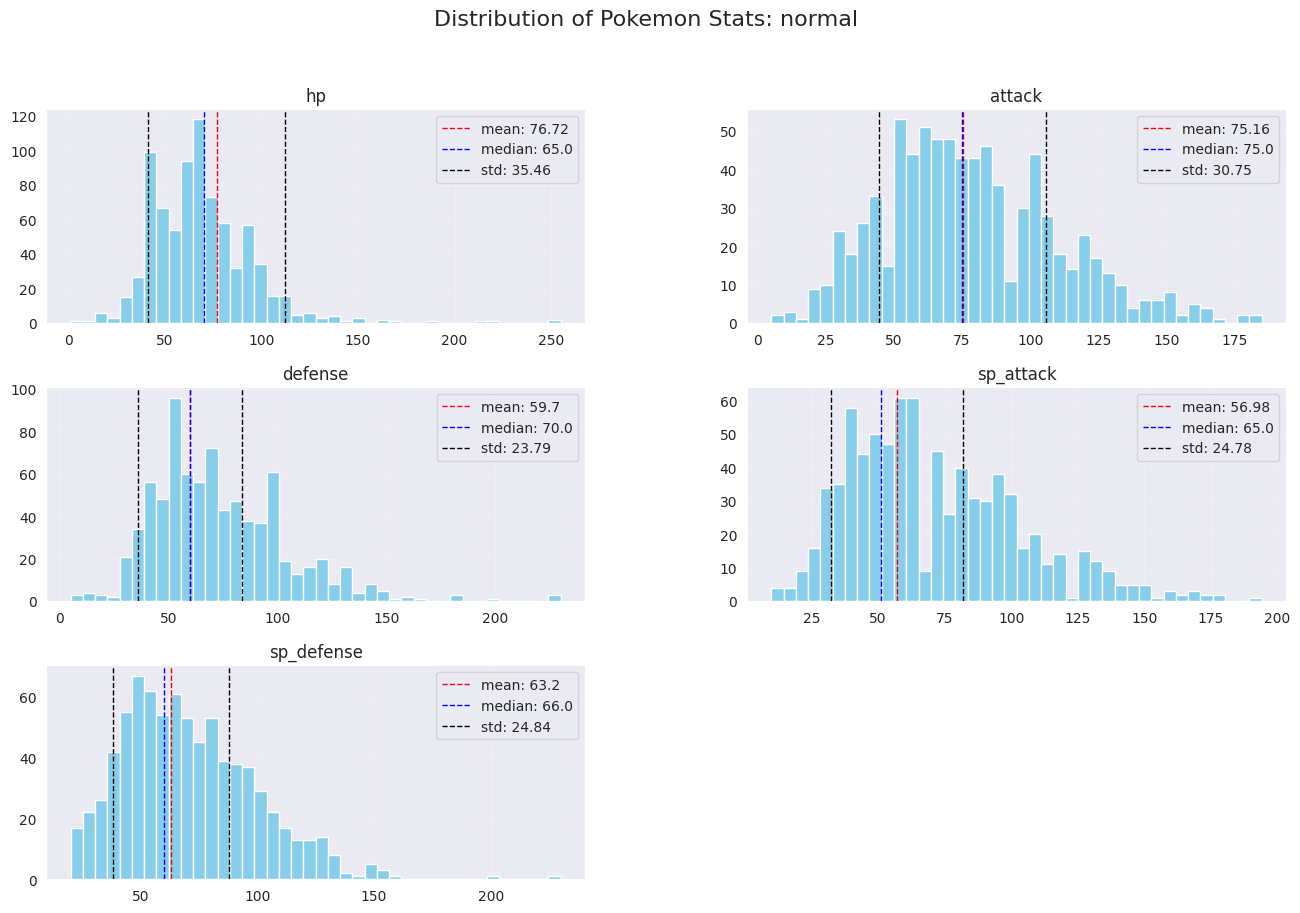

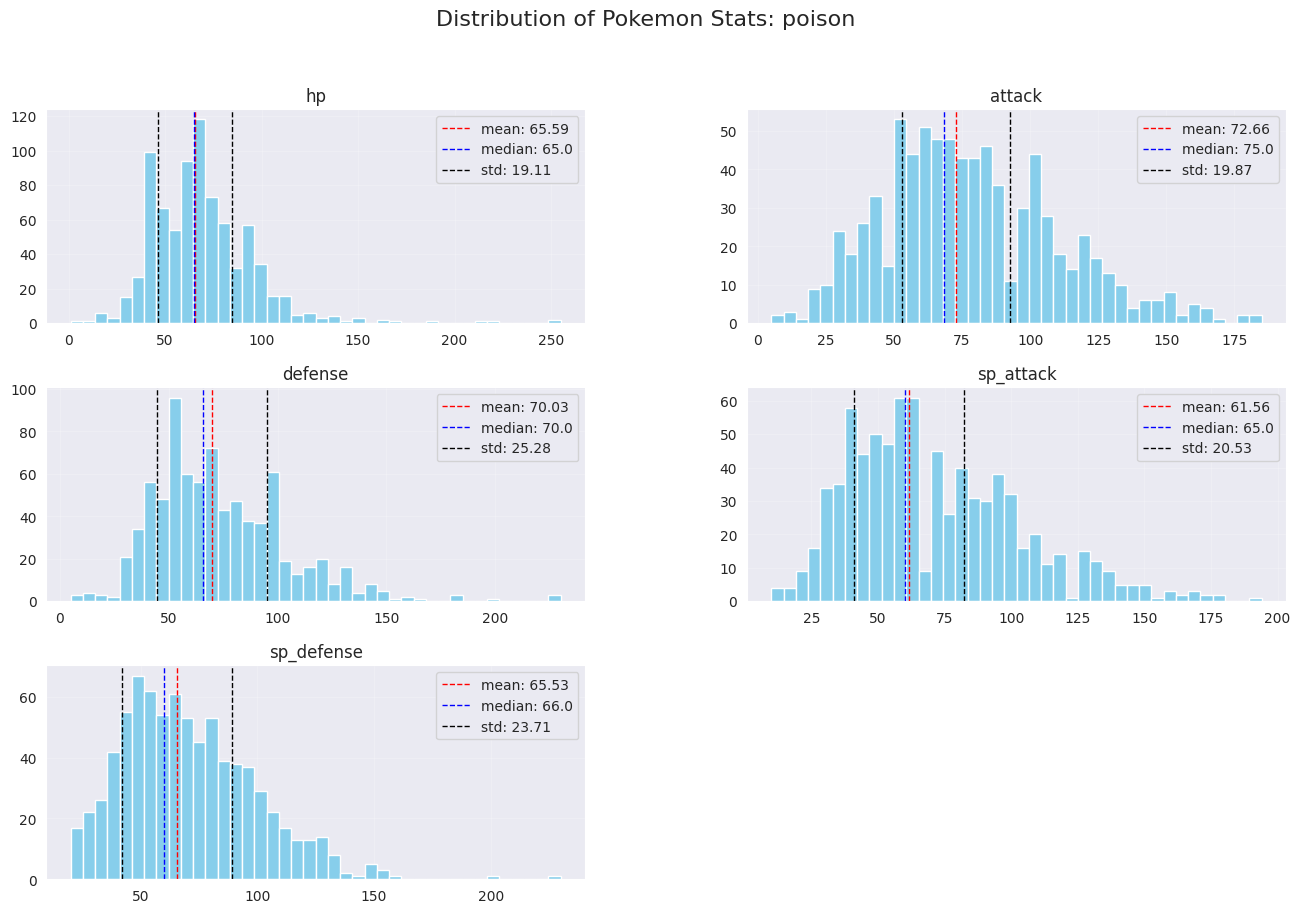

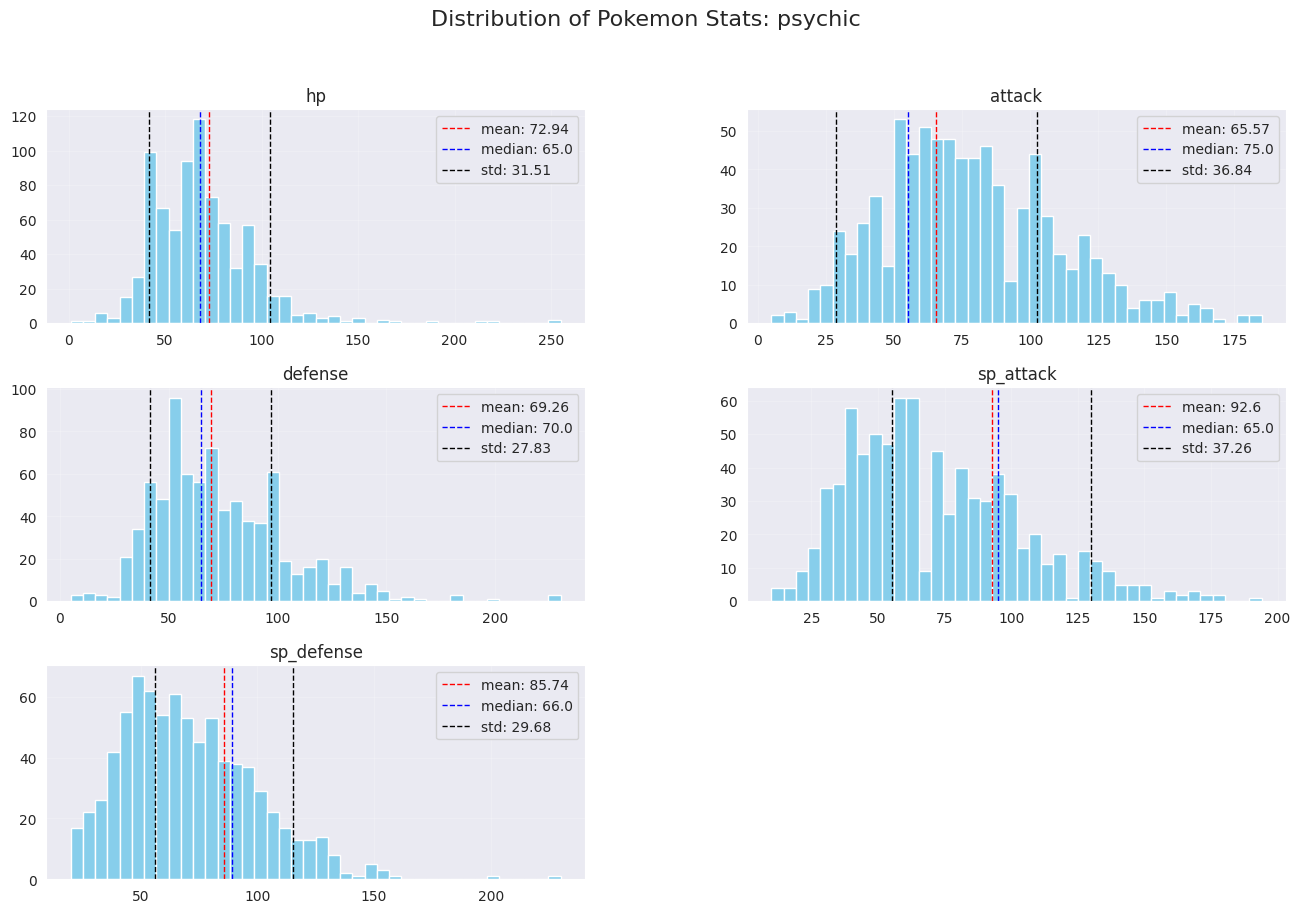

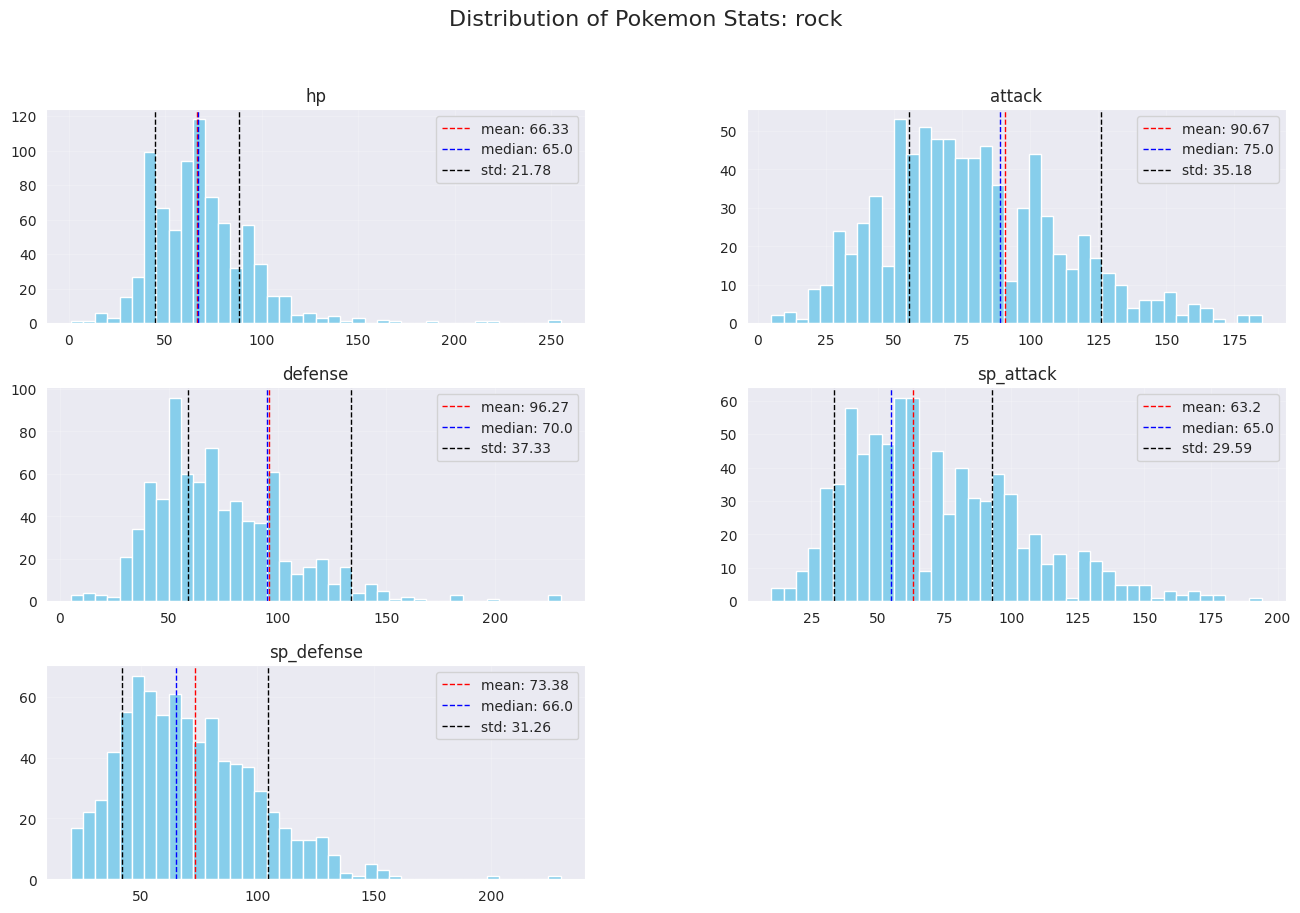

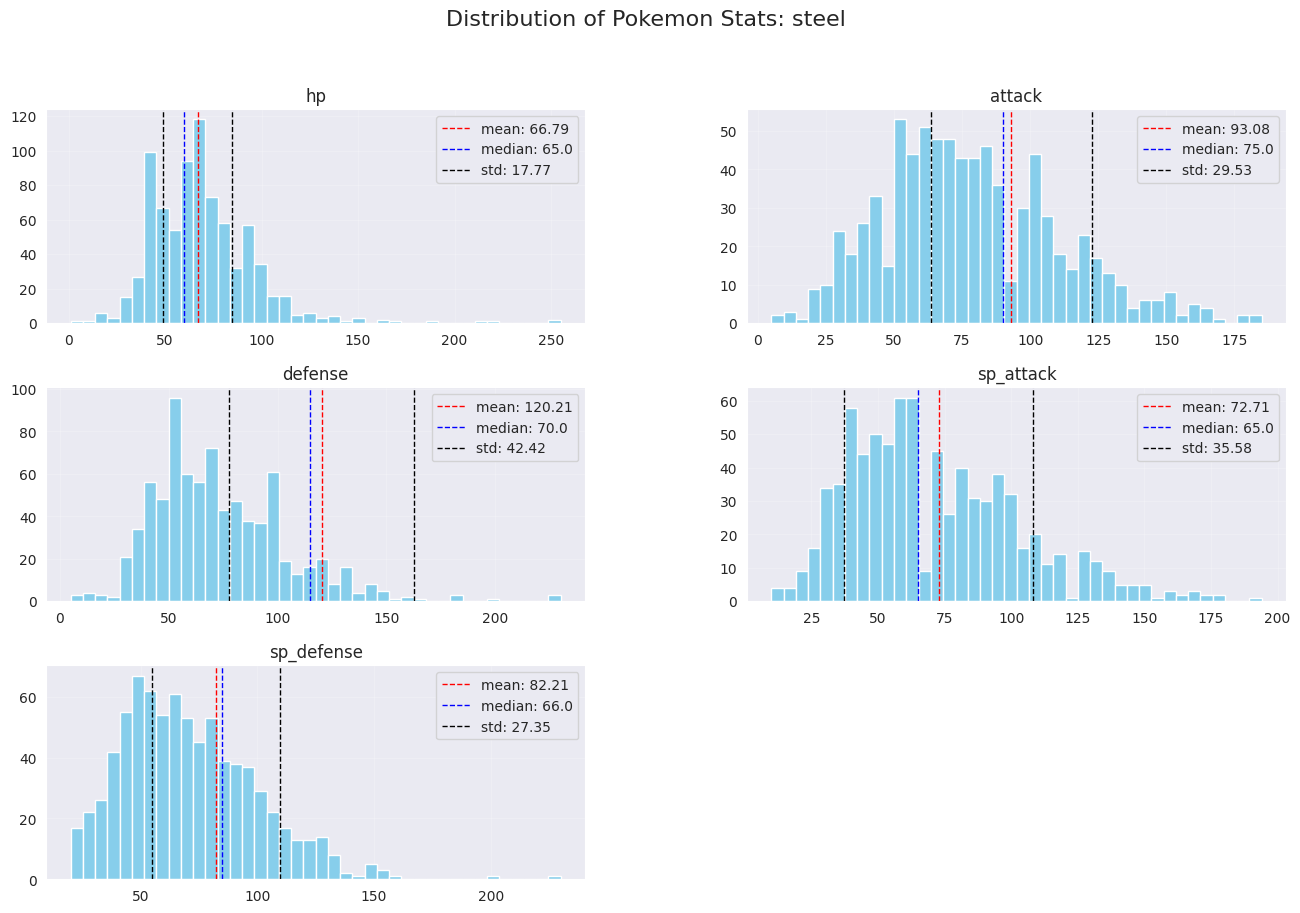

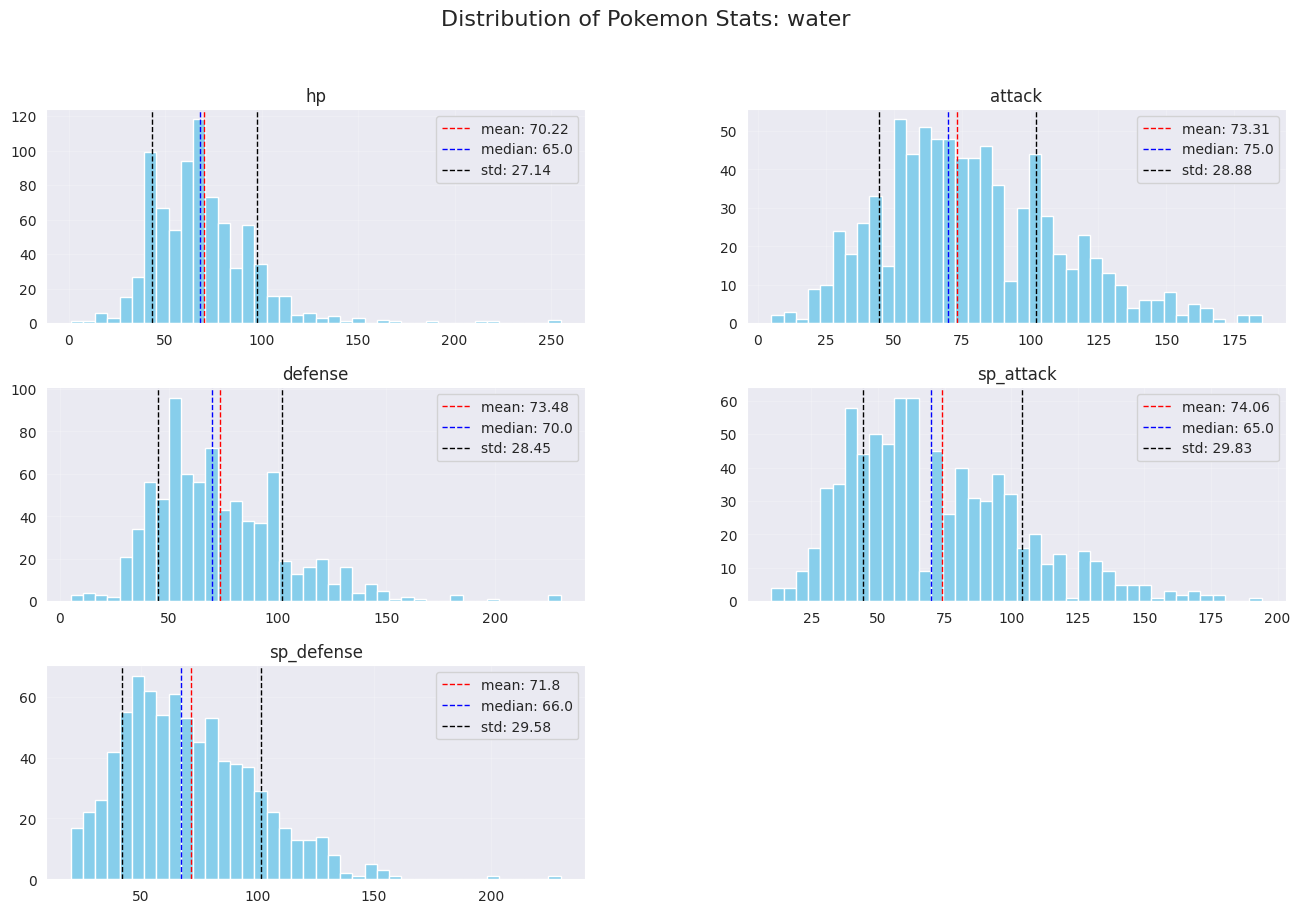

In [258]:
sns.set_style("darkgrid")
stats_col = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense']
axes = df[stats_col].hist(figsize=(16, 10), bins=40, color='skyblue')

all_types = sorted(set(df['type1'].unique()))

for t in all_types:
  type_df = df[df['type1'] == t]
  axes = df[stats_col].hist(figsize=(16, 10), bins=40, color='skyblue')

  for col, ax in zip(stats_col, axes.flatten()):

    mean = type_df[col].mean()
    std = type_df[col].std()
    ax.axvline(mean, color='red', linestyle='--', linewidth=1, label=f'mean: {round(mean, 2)}')
    ax.axvline(type_df[col].median(), color='blue', linestyle='--', linewidth=1, label=f'median: {round(df[col].median(), 2)}')
    ax.axvline(mean + std, color='k', linestyle='--', linewidth=1, label=f'std: {round(std, 2)}')
    ax.axvline(mean - std, color='k', linestyle='--', linewidth=1)
    ax.legend()

    ax.grid(alpha=0.2)

  plt.suptitle(f"Distribution of Pokemon Stats: {t}", fontsize=16)
  plt.show()

We can look into a deeper dive of each types stat distributions.

We can see that the distributions of the stats tend to be skewed to the right with larger means than medians. An exception would be the Dragon type which is skewed to the right but actually has larger medians, indicating the rpesence of some extreme outliers. This would cause a visual skew with contrasting a mean & median indicator.

Through comparison we can see that the assemsments we've been making are accurate.

## How many legendary species are there?
Lets figure out how common legendaries are

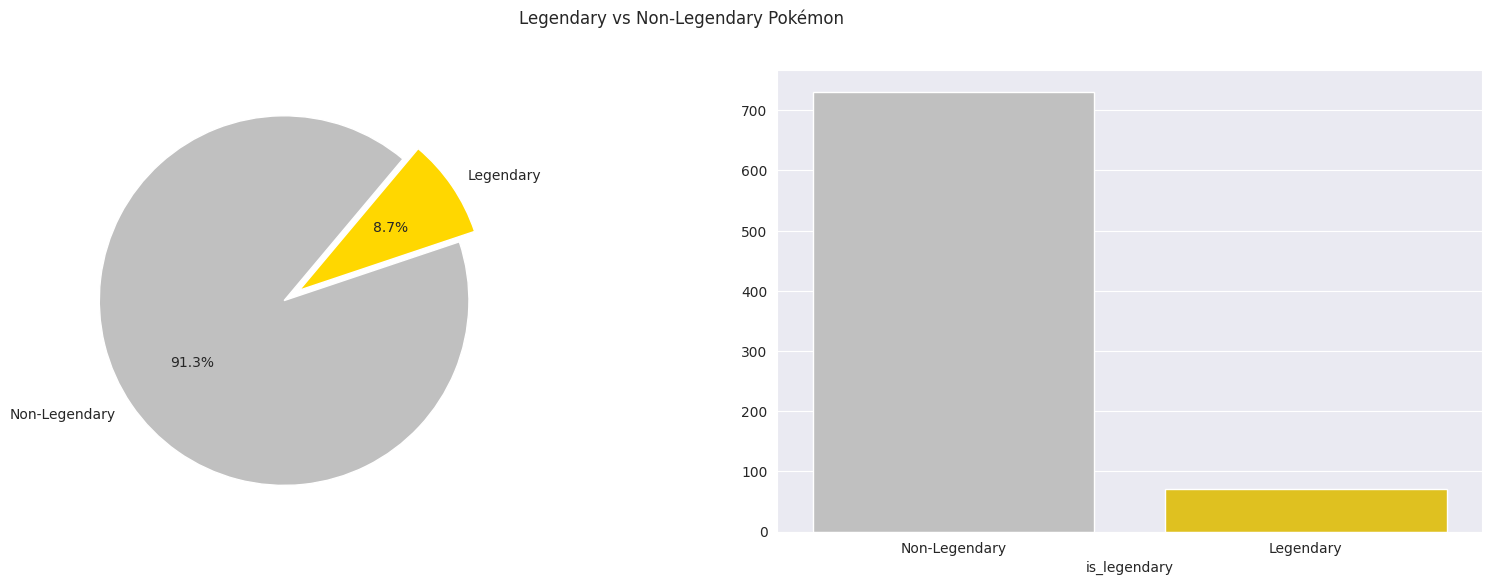

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

legendary_counts = df['is_legendary'].value_counts()
labels=legendary_counts.index.map({0: 'Non-Legendary', 1: 'Legendary'})
# plt.figure(figsize=(5,5))
axs[0].pie(
    x=legendary_counts.values,
    labels=labels,
    colors=['silver', 'gold'],
    autopct='%1.1f%%',
    startangle=50,
    explode=(0, 0.1),
    )
sns.barplot(
    x=labels,
    y=legendary_counts.values,
    hue=labels,
    ax=axs[1],
    palette=['silver', 'gold']
)
axs[1]
plt.suptitle("Legendary vs Non-Legendary Pokémon")
plt.show()


Only 8.7% of the species are legendary.

We can see visually see the difference between legendary and non-legendary. Pie charts are not as visually useful as bar-charts, but I still believe they are aesthetically pleasing and displaying percentages is internanlly made easier.



In [288]:
# Display percent of legendaries per type
legendary_per_type = pd.DataFrame(df.groupby('type1')['is_legendary'].apply(lambda x: x.sum()/x.count()).sort_values(ascending=False))
legendary_per_type

,is_legendary
type1,
flying,0.333333
psychic,0.320755
dragon,0.259259
steel,0.250000
electric,0.128205
dark,0.103448
fire,0.096154
rock,0.088889
ice,0.086957


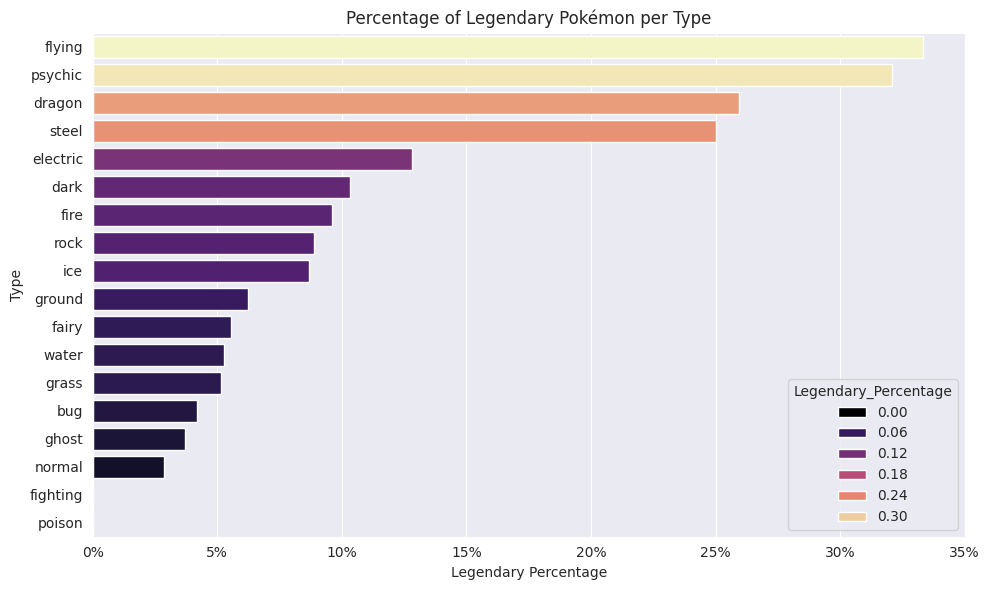

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
legendary_df = legendary_per_type.reset_index()
legendary_df.columns = ['Type', 'Legendary_Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Legendary_Percentage',
    y='Type',
    data=legendary_df,
    hue='Legendary_Percentage',
    palette='magma'
)

plt.title("Percentage of Legendary Pokémon per Type")
plt.xlabel("Legendary Percentage")
plt.ylabel("Type")

# Format x-axis as %
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()


We can see that the types with the hgihest rate of legendaries are flying, psychic, dragon, and steel. Everythign else is under 15%.

We can also see that there are no poison or fighting legendaries. Bug, ghost, and normal legendaries are also extremely rare being under 5%.

## How many dual type species are there?
Lets find out how common dual types are.

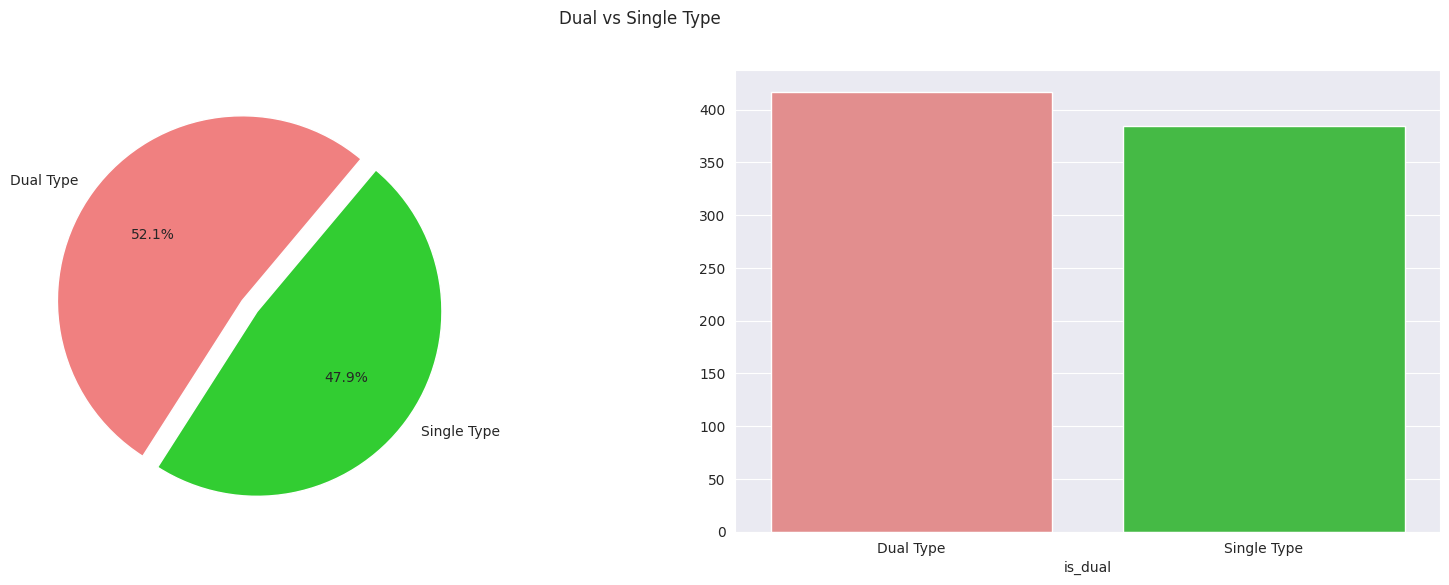

In [277]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df["is_dual"] = df["type2"].notna()

dual_counts = df['is_dual'].value_counts()
labels=dual_counts.index.map({False: 'Single Type', True: 'Dual Type'})
# plt.figure(figsize=(5,5))
axs[0].pie(
    x=dual_counts.values,
    labels=labels,
    colors=['lightcoral', 'limegreen'],
    autopct='%1.1f%%',
    startangle=50,
    explode=(0, 0.1),
    )
sns.barplot(
    x=labels,
    y=dual_counts.values,
    hue=labels,
    ax=axs[1],
    palette=['lightcoral', 'limegreen']
)
axs[1]
plt.suptitle("Dual vs Single Type")
plt.show()

About half, 52.1%, of species are dual type.

In [282]:
# Display percent of dual types  per type
dual_per_type = pd.DataFrame(df.groupby('type1')['is_dual'].apply(lambda x: x.sum()/x.count()).sort_values(ascending=False))
dual_per_type

,is_dual
type1,
steel,0.833333
rock,0.755556
bug,0.750000
dark,0.689655
ground,0.687500
ghost,0.666667
flying,0.666667
poison,0.593750
dragon,0.555556


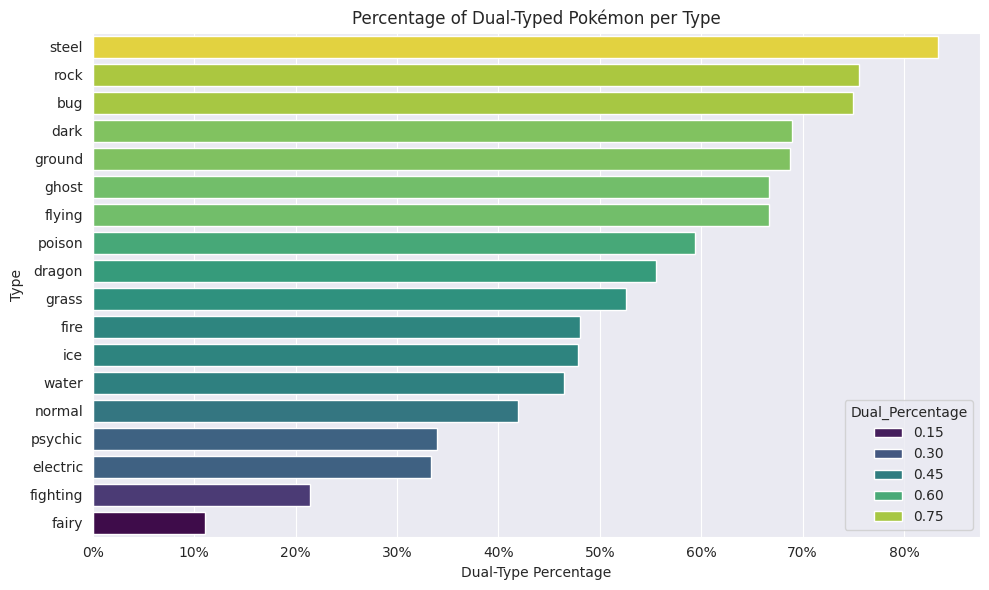

In [285]:
# Convert to DataFrame for plotting
dual_df = dual_per_type.reset_index()
dual_df.columns = ['Type', 'Dual_Percentage']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Dual_Percentage',
    y='Type',
    hue='Dual_Percentage',
    data=dual_df,
    palette='viridis'
)

plt.title("Percentage of Dual-Typed Pokémon per Type")
plt.xlabel("Dual-Type Percentage")
plt.ylabel("Type")

# Format x-axis as %
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.tight_layout()
plt.show()

We can see that steel and rock are the most common types to have a secondary as well, while fairy and fighting